In [1]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

# import matplotlib as mlp
# mlp.style.use('classic')

In [2]:
import tensorflow as tf

Try to get an intuition by optimizing simple function with different gradient descent optimization algorithms.

$$f(x) = (x - \theta)^2$$

In [3]:
x = tf.placeholder(dtype=tf.float32, shape=None, name='x')
y = tf.placeholder(dtype=tf.float32, shape=None, name='y')

In [4]:
OPTIMIZERS = [
    'GradientDescentOptimizer',
    
    'AdamOptimizer',
    'FtrlOptimizer',
    'ProximalGradientDescentOptimizer',
    'ProximalAdagradOptimizer',
    'RMSPropOptimizer',
    'AdadeltaOptimizer',
    'AdagradOptimizer',
    
    # need more than a learning_rate parameter
#     'AdagradDAOptimizer',
#     'MomentumOptimizer',

]

In [5]:
theta_vars = []
optimizers = []
lr = 0.001

for optimizer_str in OPTIMIZERS:
    the_optimizer = eval('tf.train.' + optimizer_str)
    theta_name = 'theta' + '-' + optimizer_str
    
    with tf.variable_scope(theta_name):
        theta = tf.get_variable(theta_name, shape=[1], initializer=tf.constant_initializer(value=10))
    
    with tf.name_scope('loss'):
        loss = tf.losses.mean_squared_error(y, tf.square(x - theta))
    theta_vars.append(theta)
    
    with tf.name_scope(optimizer_str):
        optimizer = the_optimizer(learning_rate=lr).minimize(loss)
    optimizers.append(optimizer)

In [6]:
writer = tf.summary.FileWriter('./graphs', tf.get_default_graph())
writer.close()

The graph looks like such

![graph](./gradient-descent-optimization-algos-tf-graph.png)

In [11]:
coeffs = [4, -4, 1]

The coeffs correspond to the following function:

$$f(x) = (x - 2)^2 = 4 - 4x + x^2 $$

In [7]:
def poly_generator(coeffs, batch_size=320):
    while True:
        x = np.random.uniform(-10.0, 10.0, batch_size)
        y = np.polynomial.polynomial.polyval(x, coeffs)
        yield x, y

In [8]:
the_batch_size = 16
num_steps = 1000000

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    theta_hist = []
    for k, (in_x, in_y) in enumerate(poly_generator(coeffs, the_batch_size)):
        fd = feed_dict={
            x: in_x,
            y: in_y
        }

#         optimizer.run(feed_dict=fd)
        sess.run([optimizers], feed_dict=fd)
        theta_hist.append(sess.run(theta_vars))
        if (k + 1) == num_steps:
            break

theta_hist_arr = np.array(theta_hist)
theta_hist_arr = theta_hist_arr[:, :, 0].T

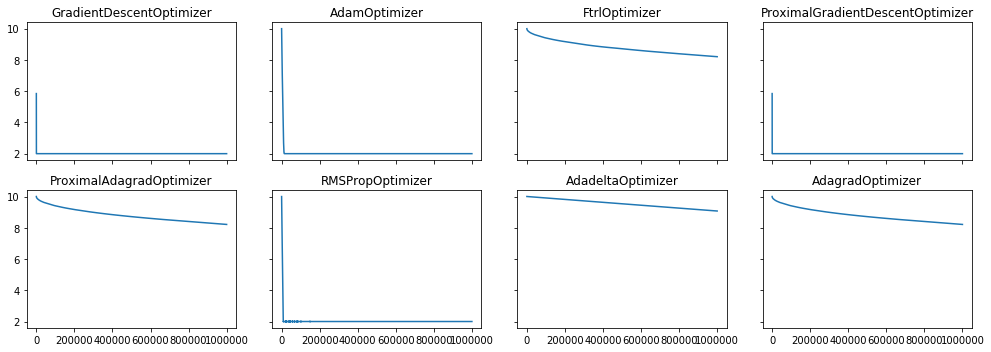

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(14, 5), sharex=True, sharey=True)
axes = axes.ravel()

for k, (the, optim) in enumerate(zip(theta_hist_arr, OPTIMIZERS)):
    ax = axes[k]
    ax.plot(the, label=optim)
    ax.set_title(optim)
plt.tight_layout()


For some reason, some of the optimizers don't converge quickly, could be due to their arguments. Currently, I just specified learning rate and it's the same for all optimizers.